In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [2]:
from utils.test_utils import plot_results, load_logs

In [3]:
import copy
from utils.test_utils import average_performance

In [155]:
# save_dirs = ["../results/simulation/220414_1312","../results/simulation/220416_1456"]
ent_save_dirs = [
    "../results/simulation/220414_1314",
                "../results/simulation/220414_1358",
                "../results/simulation/220414_1542",
                "../results/simulation/220416_1915",
                "../results/simulation/220416_1957",
                "../results/simulation/220416_2104",
                "../results/simulation/220417_0017",
                "../results/simulation/220417_1655",
                "../results/simulation/220417_1846",
                "../results/simulation/220417_1954",
                "../results/simulation/220417_2038"
]

bes_save_dirs = ["../results/simulation/220416_1914",
#                  "../results/simulation/220416_1456",
                "../results/simulation/220417_0022",
                "../results/simulation/220417_0102",
                "../results/simulation/220417_0158",
                "../results/simulation/220417_0913",
                "../results/simulation/220417_0955",
                "../results/simulation/220417_1040",
                "../results/simulation/220417_1652",
                "../results/simulation/220417_1736",
                "../results/simulation/220419_2117",
                "../results/simulation/220419_2200",
                "../results/simulation/220419_2318"]

entbe_save_dirs = ["../results/simulation/220417_1847",
                   "../results/simulation/220420_2326",
                    "../results/simulation/220421_0008",
                    "../results/simulation/220421_0053"
                    ]

In [170]:
import os
import pickle
from utils import LogsAVG

def load_logs_cls(save_dirs):
    logs = []
    logs_lr = []
    for dr in save_dirs:
        with open(os.path.join(dr, "clf_logs.cls"), "rb") as f:
            logs.append(pickle.load(f))
        with open(os.path.join(dr, "clf_lr_logs.cls"), "rb") as f:
            logs_lr.append(pickle.load(f))
    return logs, logs_lr

def get_avg_cls(save_dirs):
    logs, logs_lr = load_logs_cls(save_dirs)
    logs_avg = LogsAVG(logs)
    logslr_avg = LogsAVG(logs_lr)
    return logs_avg, logslr_avg

In [171]:
ent_logs_avg, ent_logslr_avg = get_avg_cls(ent_save_dirs)
bes_logs_avg, bes_logslr_avg = get_avg_cls(bes_save_dirs)
entbe_logs_avg, entbe_logslr_avg = get_avg_cls(entbe_save_dirs)

/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  logs['g0'][cl] = torch.tensor(logs['g0'][cl])
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  logs['g1'][cl] = torch.tensor(logs['g1'][cl])


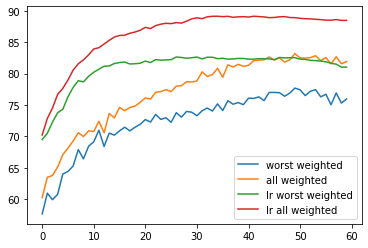

In [172]:
from utils import plot_compare

logs_avg = ent_logs_avg
logslr_avg = ent_logslr_avg

crit = 'weighted'#'accuracy','roc_auc'
testw = [logs_avg.test['w'][crit],logs_avg.test['all'][crit],logslr_avg.test['w'][crit],logslr_avg.test['all'][crit]]
name_list = ["worst "+crit, "all "+crit,"lr worst "+crit, "lr all "+crit]
plot_compare(testw,name_list)

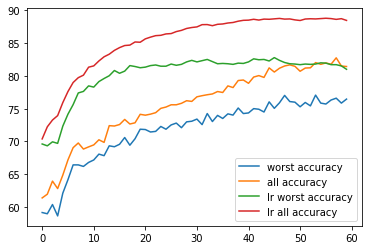

In [183]:
from utils import plot_compare

logs_avg = bes_logs_avg
logslr_avg = bes_logslr_avg

crit = 'accuracy'#'accuracy','roc_auc'
testw = [logs_avg.test['w'][crit],logs_avg.test['all'][crit],logslr_avg.test['w'][crit],logslr_avg.test['all'][crit]]
name_list = ["worst "+crit, "all "+crit,"lr worst "+crit, "lr all "+crit]
plot_compare(testw,name_list)

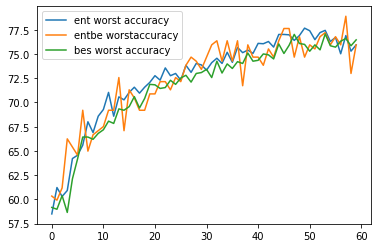

In [189]:
from utils import plot_compare

crit = 'accuracy'#'accuracy','roc_auc','weighted'
cat = 'w'
# testw = [ent_logslr_avg.test[cat][crit],entbe_logslr_avg.test[cat][crit],bes_logslr_avg.test[cat][crit]]
testw = [ent_logs_avg.test[cat][crit],entbe_logs_avg.test[cat][crit],bes_logs_avg.test[cat][crit]]
name_list = ["ent worst "+crit,"entbe worst"+crit,"bes worst "+crit]
plot_compare(testw,name_list)

In [85]:
logslr_avg.test

{'all': {'weighted': tensor([70.2302, 72.2169, 73.1527, 74.1095, 76.1002, 77.6303, 78.6521, 79.4789,
          79.7011, 81.2842, 81.9077, 82.4688, 83.0990, 83.4744, 84.1502, 84.5211,
          84.6692, 84.8760, 85.2772, 85.4270, 85.9206, 86.3084, 86.4441, 86.4143,
          86.5622, 86.7566, 87.0386, 87.2759, 87.5131, 87.7954, 87.8531, 88.1638,
          88.0602, 87.8215, 88.1481, 88.1782, 88.3424, 88.3417, 88.5194, 88.5938,
          88.6086, 88.8172, 88.6545, 88.7874, 88.6535, 88.7434, 88.9065, 88.7575,
          88.7865, 88.7133, 88.6541, 88.8764, 88.7876, 88.7430, 88.7877, 88.7880,
          88.7583, 88.6543, 88.6984, 88.4759], dtype=torch.float64),
  'macro': tensor([69.9848, 72.1816, 73.1967, 74.1656, 76.1476, 77.6699, 78.6892, 79.5068,
          79.7265, 81.2962, 81.9140, 82.4726, 83.0966, 83.4694, 84.1369, 84.5084,
          84.6584, 84.8639, 85.2661, 85.4151, 85.9014, 86.2862, 86.4163, 86.3871,
          86.5321, 86.7236, 87.0056, 87.2413, 87.4750, 87.7573, 87.8103, 88.1194,
 